## Analisis Exploratorio

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Configuración de estilo para gráficos más bonitos
plt.style.use('default')
sns.set_palette("husl")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📊 Librerías cargadas para análisis exploratorio")

📊 Librerías cargadas para análisis exploratorio


In [2]:
# Cargar datos y diccionario de datos
df = pd.read_csv('../data/ARR3_DF_FINAL_preserved.csv')
dict_data = pd.read_excel('../docs/ARR3_DF_FINAL_DataDictionary.xlsx')

print(f"📊 ANÁLISIS EXPLORATORIO DE DATOS - DATASET DE VIBRACIÓN")
print("=" * 60)
print(f"📈 Datos cargados: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"📚 Diccionario cargado: {dict_data.shape[0]} variables documentadas")

📊 ANÁLISIS EXPLORATORIO DE DATOS - DATASET DE VIBRACIÓN
📈 Datos cargados: 2234 filas × 327 columnas
📚 Diccionario cargado: 327 variables documentadas


## 📋 Resumen General del Dataset

In [3]:
# Resumen general del dataset
print(f"📋 RESUMEN GENERAL DEL DATASET")
print("-" * 50)

# Información básica
print(f"Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Tipos de variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"\nTipos de variables:")
print(f"   • Numéricas: {len(numeric_cols)} ({len(numeric_cols)/len(df.columns)*100:.1f}%)")
print(f"   • Categóricas: {len(categorical_cols)} ({len(categorical_cols)/len(df.columns)*100:.1f}%)")

# Valores faltantes
missing_total = df.isnull().sum().sum()
print(f"\nValores faltantes: {missing_total:,} ({missing_total/(df.shape[0]*df.shape[1])*100:.2f}%)")

# Estadísticas descriptivas (muestra)
print(f"\n🔢 MUESTRA DE ESTADÍSTICAS DESCRIPTIVAS (primeras 5 variables numéricas):")
sample_stats = df[numeric_cols[:5]].describe()
print(sample_stats.round(6))

📋 RESUMEN GENERAL DEL DATASET
--------------------------------------------------
Dimensiones: 2,234 filas × 327 columnas
Memoria utilizada: 5.7 MB

Tipos de variables:
   • Numéricas: 326 (99.7%)
   • Categóricas: 1 (0.3%)

Valores faltantes: 0 (0.00%)

🔢 MUESTRA DE ESTADÍSTICAS DESCRIPTIVAS (primeras 5 variables numéricas):
        Unnamed: 0        Do_mm        Ht_mm        Di_mm           S1
count  2234.000000  2234.000000  2234.000000  2234.000000  2234.000000
mean   1116.500000   890.193823   414.007055   178.379857    26.692095
std     645.044572    69.398724     6.351399    29.111879     1.903074
min       0.000000   749.300000   407.640000   114.300000    22.870000
25%     558.250000   850.900000   407.640000   165.100000    25.590000
50%    1116.500000   952.500000   420.340000   203.200000    28.410000
75%    1674.750000   952.500000   420.340000   203.200000    28.410000
max    2233.000000   952.500000   420.340000   203.200000    28.410000


## 🎯 Análisis de Variable Objetivo: Nivel_Dano

In [4]:
for i in (df['Nivel_Dano'].value_counts(normalize=True).sort_index() * 100):
    print(i)

52.6857654431513
35.85496866606983
11.459265890778871


In [5]:
# Análisis detallado de la variable objetivo Nivel_Dano
print(f"🎯 ANÁLISIS DE VARIABLE OBJETIVO: Nivel_Dano")
print("-" * 50)

# Información básica
print(f"Tipo de variable: {df['Nivel_Dano'].dtype}")
print(f"Valores únicos: {df['Nivel_Dano'].nunique()}")
print(f"Valores faltantes: {df['Nivel_Dano'].isnull().sum()}")

# Distribución de clases
class_counts = df['Nivel_Dano'].value_counts().sort_index()
class_props = df['Nivel_Dano'].value_counts(normalize=True).sort_index() * 100 # porcentajes

print(f"\n📊 DISTRIBUCIÓN DE CLASES:")
for clase, count in class_counts.items():
    prop = class_props[clase]
    print(f"   {clase}: {count:,} muestras ({prop:.1f}%)")

# Evaluar balance
print(f"\n⚖️  EVALUACIÓN DE BALANCE DE DATOS:")
max_class = class_props.max()
min_class = class_props.min()
balance_ratio = max_class / min_class

if balance_ratio <= 1.5:
    balance_status = "🟢 BALANCEADO"
elif balance_ratio <= 3.0:
    balance_status = "🟡 LIGERAMENTE DESBALANCEADO"
else:
    balance_status = "🔴 DESBALANCEADO"

print(f"   Clase mayoritaria: {max_class:.1f}%")
print(f"   Clase minoritaria: {min_class:.1f}%")
print(f"   Ratio de desbalance: {balance_ratio:.2f}:1")
print(f"   Estado: {balance_status}")

🎯 ANÁLISIS DE VARIABLE OBJETIVO: Nivel_Dano
--------------------------------------------------
Tipo de variable: object
Valores únicos: 3
Valores faltantes: 0

📊 DISTRIBUCIÓN DE CLASES:
   N1: 1,177 muestras (52.7%)
   N2: 801 muestras (35.9%)
   N3: 256 muestras (11.5%)

⚖️  EVALUACIÓN DE BALANCE DE DATOS:
   Clase mayoritaria: 52.7%
   Clase minoritaria: 11.5%
   Ratio de desbalance: 4.60:1
   Estado: 🔴 DESBALANCEADO


## 📈 Visualizaciones con SEABORN

/var/folders/64/m87yf3yx7zngv12wrzgqgj_w0000gn/T/ipykernel_70817/4268631339.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Nivel_Dano', y=sample_col, ax=axes[1,1], palette='coolwarm')


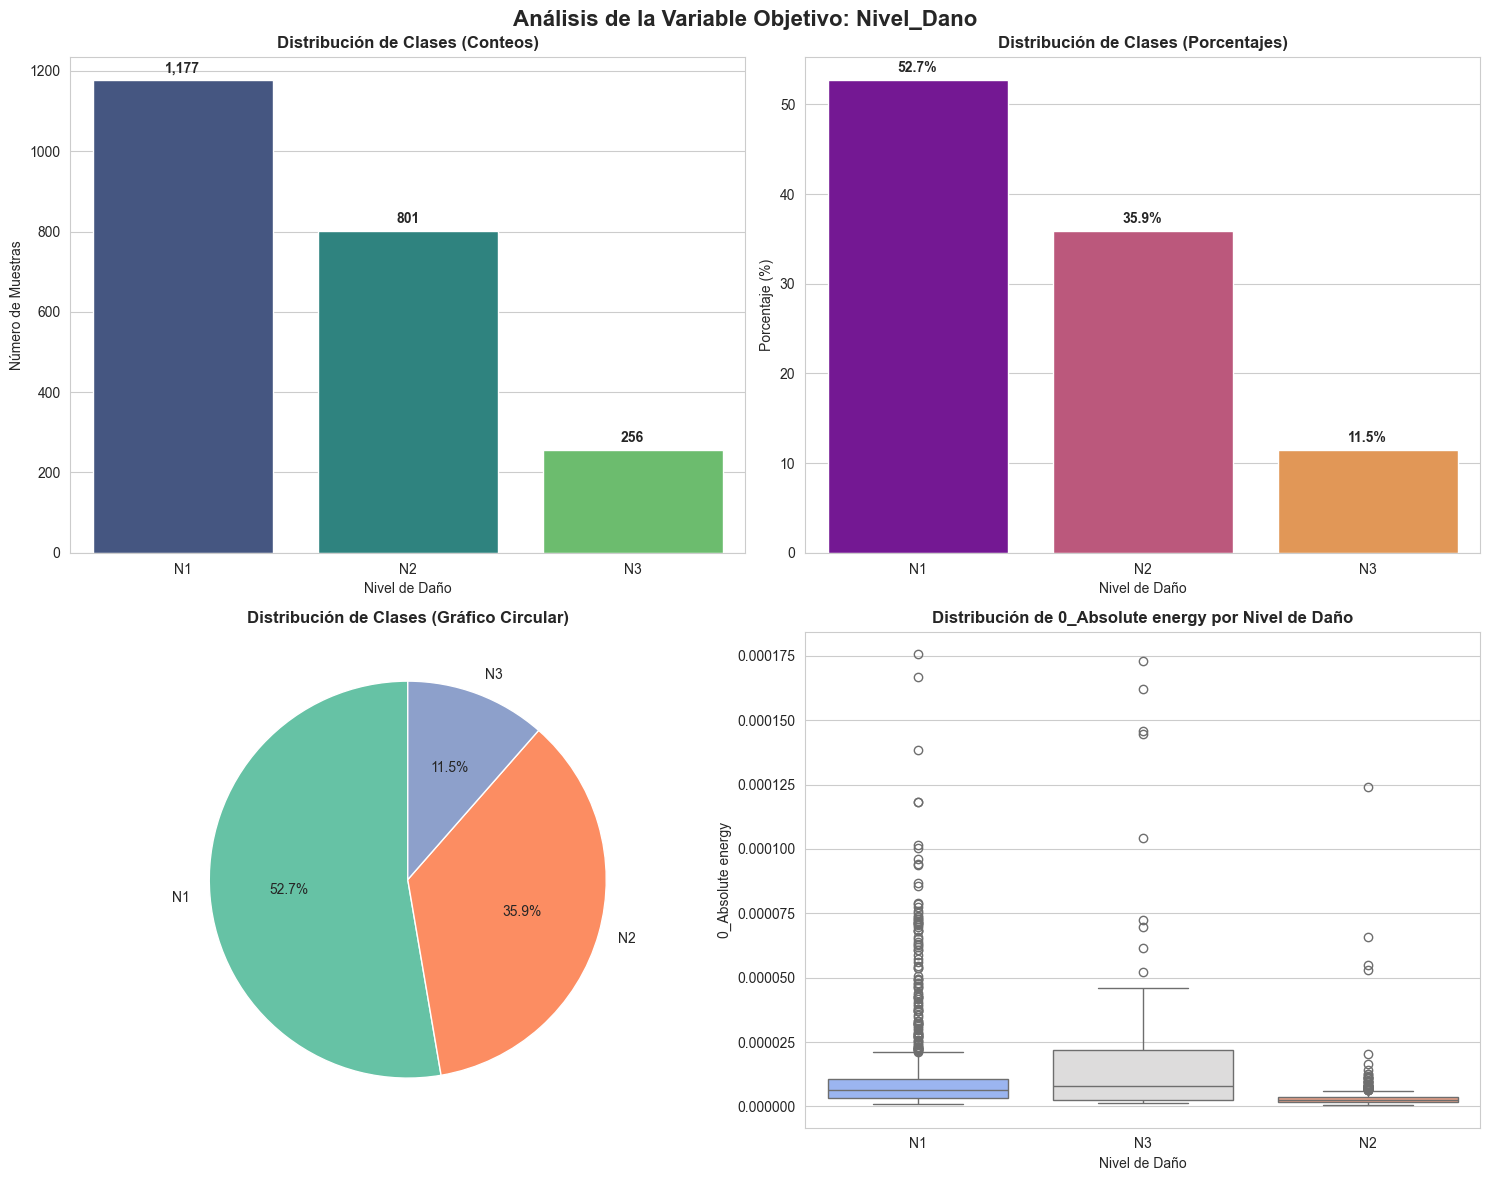

In [6]:
# Crear visualizaciones de la variable objetivo con SEABORN
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis de la Variable Objetivo: Nivel_Dano', fontsize=16, fontweight='bold')

# 1. Gráfico de barras con conteos
sns.barplot(x=class_counts.index, y=class_counts.values, ax=axes[0,0], 
            hue=class_counts.index, palette='viridis', legend=False)
axes[0,0].set_title('Distribución de Clases (Conteos)', fontweight='bold')
axes[0,0].set_xlabel('Nivel de Daño')
axes[0,0].set_ylabel('Número de Muestras')

# Agregar etiquetas a las barras
for i, v in enumerate(class_counts.values):
    axes[0,0].text(i, v + max(class_counts.values) * 0.01, f'{v:,}', 
                   ha='center', va='bottom', fontweight='bold')

# 2. Gráfico de barras con proporciones
sns.barplot(x=class_props.index, y=class_props.values, ax=axes[0,1], 
            hue=class_props.index, palette='plasma', legend=False)
axes[0,1].set_title('Distribución de Clases (Porcentajes)', fontweight='bold')
axes[0,1].set_xlabel('Nivel de Daño')
axes[0,1].set_ylabel('Porcentaje (%)')

# Agregar etiquetas a las barras
for i, v in enumerate(class_props.values):
    axes[0,1].text(i, v + max(class_props.values) * 0.01, f'{v:.1f}%', 
                   ha='center', va='bottom', fontweight='bold')

# 3. Gráfico de pastel
colors = sns.color_palette('Set2', len(class_counts))
axes[1,0].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
              colors=colors, startangle=90)
axes[1,0].set_title('Distribución de Clases (Gráfico Circular)', fontweight='bold')

# 4. Boxplot con variable de energía
energy_cols = [col for col in numeric_cols if 'energy' in col.lower()]
if energy_cols:
    sample_col = energy_cols[0]
    sns.boxplot(data=df, x='Nivel_Dano', y=sample_col, ax=axes[1,1], palette='coolwarm')
    axes[1,1].set_title(f'Distribución de {sample_col} por Nivel de Daño', fontweight='bold')
    axes[1,1].set_xlabel('Nivel de Daño')
    axes[1,1].set_ylabel(sample_col)
else:
    # Usar primera variable numérica disponible
    sample_col = numeric_cols[1]  # Skip index column
    sns.boxplot(data=df, x='Nivel_Dano', y=sample_col, ax=axes[1,1], palette='coolwarm')
    axes[1,1].set_title(f'Distribución de {sample_col} por Nivel de Daño', fontweight='bold')

plt.tight_layout()
plt.show()

## 📊 Conclusiones del Análisis Exploratorio

### **🎯 Variable Objetivo (Nivel_Dano)**
- **3 clases de daño:** N1, N2, N3
- **Estado:** 🔴 **DESBALANCEADO** (ratio 4.60:1)
- **Distribución:** N1 (52.7%), N2 (35.9%), N3 (11.5%)

### **📋 Dataset General**
- **2,234 muestras** con **327 variables**
- **326 variables numéricas** (99.7%) - Ideal para ML
- **0 valores faltantes** - Dataset limpio

### **🔧 Recomendaciones para Modelado**
Para el desbalance de clases, considera:
- **Técnicas de oversampling** (SMOTE)
- **Pesos de clase** en el modelo
- **Métricas balanceadas** (F1-score, AUC-ROC)